<a href="https://colab.research.google.com/github/Pooja-0708/AI-defect-detection/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data="/content/drive/MyDrive/18 yolo/data.yaml" epochs=280 plots=True batch=16 imgsz=640 pretrained=True save=True project="/content/drive/MyDrive/yolo_training_results" name="train_run1"


Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/18 yolo/data.yaml, epochs=280, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_training_results, name=train_run13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Load trained YOLOv8 model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Path to validation images and labels
val_img_dir = "/content/drive/MyDrive/18 yolo/images/val"
val_label_dir = "/content/drive/MyDrive/18 yolo/labels/val"

# Run prediction on validation set
results = model.predict(source=val_img_dir, imgsz=640, conf=0.25, stream=True)

# Function to load true label classes for an image
def load_true_classes(image_name):
    base_name = os.path.splitext(image_name)[0]
    label_path = os.path.join(val_label_dir, base_name + ".txt")

    true_classes = set()
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    cls_id = int(line.strip().split()[0])
                    true_classes.add(cls_id)
    return true_classes

# Visualize each prediction
def plot_result(result):
    img = result.orig_img.copy()
    image_name = os.path.basename(result.path)

    true_classes = load_true_classes(image_name)

    kept_boxes = []
    kept_labels = []

    for i, box in enumerate(result.boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])

        # Keep only if predicted class matches true class
        if cls_id in true_classes:
            kept_boxes.append((x1, y1, x2, y2, conf, cls_id))
            kept_labels.append(result.names[cls_id])

    # Draw only the correct predictions
    for (x1, y1, x2, y2, conf, cls_id) in kept_boxes:
        label = result.names[cls_id]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Convert BGR to RGB for display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{image_name} (Correct Predictions Only)")
    plt.show()

# Loop through and display corrected predictions
for result in results:
    plot_result(result)



image 1/141 /content/drive/MyDrive/18 yolo/images/val/CMC16.png: 576x640 1 Edge etching, 61.7ms
image 2/141 /content/drive/MyDrive/18 yolo/images/val/CMC18.png: 576x640 1 Edge etching, 46.9ms
image 3/141 /content/drive/MyDrive/18 yolo/images/val/CMC_delam1.png: 576x640 1 CMC_delamination, 36.0ms
image 4/141 /content/drive/MyDrive/18 yolo/images/val/CMC_delam2.png: 576x640 1 CMC_delamination, 1 Crack, 35.6ms
image 5/141 /content/drive/MyDrive/18 yolo/images/val/CMC_delam4.png: 576x640 1 CMC_delamination, 36.1ms
image 6/141 /content/drive/MyDrive/18 yolo/images/val/CorkCFRP8.png: 576x640 1 Debond, 36.0ms
image 7/141 /content/drive/MyDrive/18 yolo/images/val/Crack_5.png: 480x640 1 Crack, 28.5ms
image 8/141 /content/drive/MyDrive/18 yolo/images/val/Debond_7.png: 480x640 2 Debonds, 25.6ms
image 9/141 /content/drive/MyDrive/18 yolo/images/val/Debond_8.png: 480x640 2 Debonds, 27.5ms
image 10/141 /content/drive/MyDrive/18 yolo/images/val/Delam11.png: 576x640 2 GFRP_delaminations, 33.2ms
image

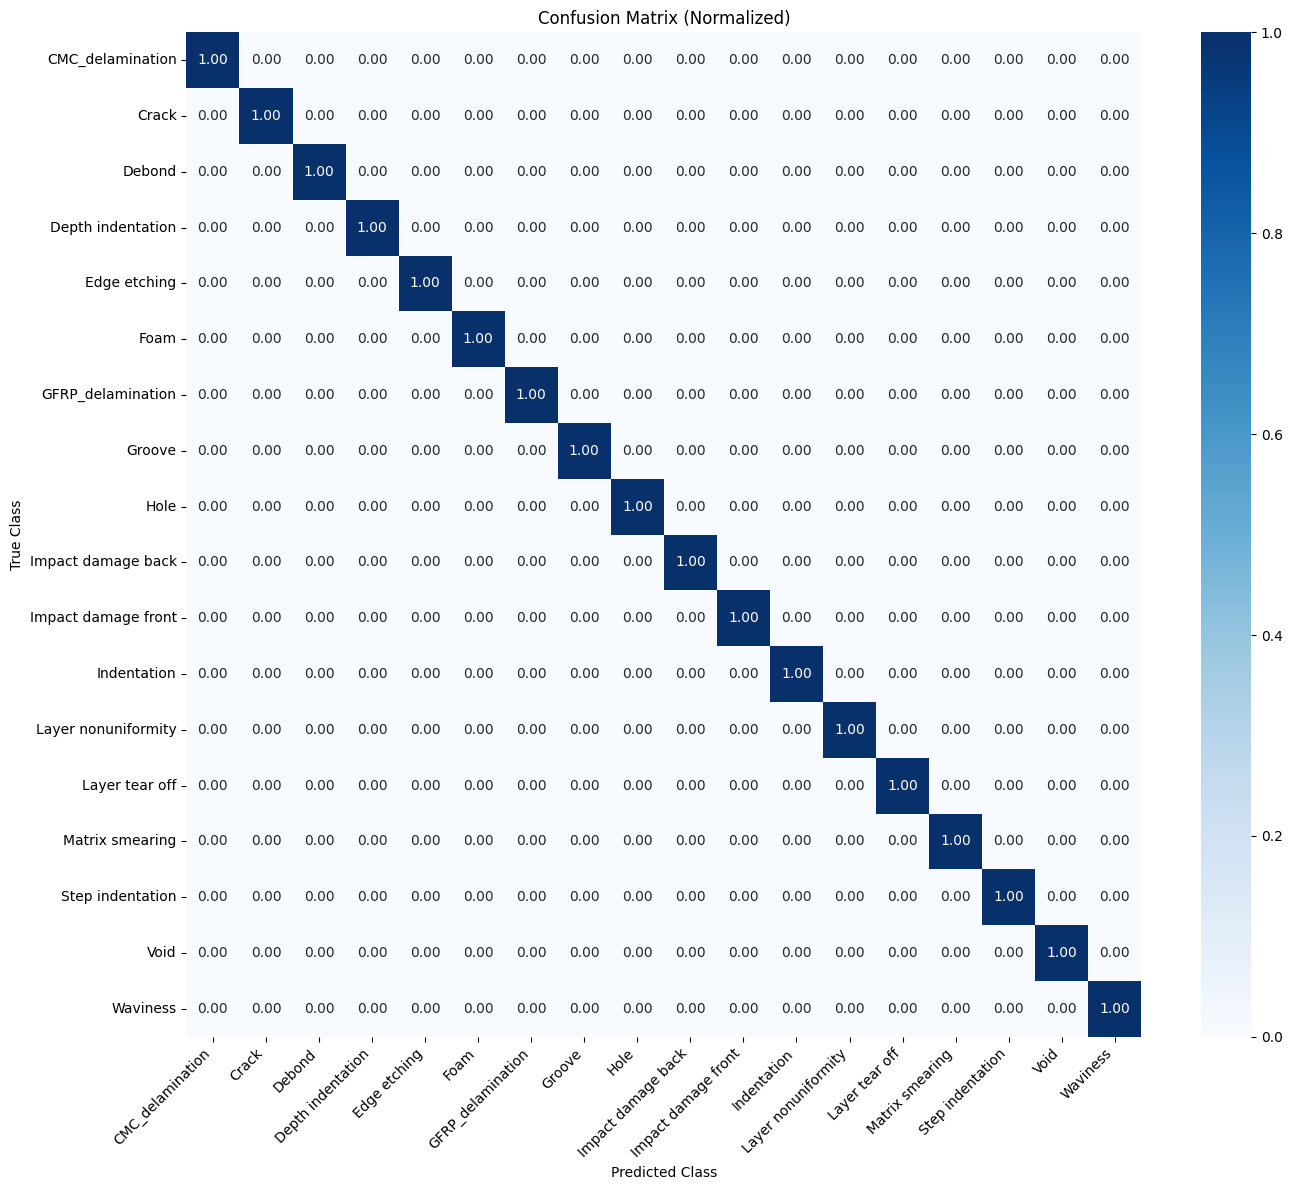

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Validation images and labels
val_img_dir = "/content/drive/MyDrive/18 yolo/images/val"
val_label_dir = "/content/drive/MyDrive/18 yolo/labels/val"

# Run prediction
results = model.predict(source=val_img_dir, imgsz=640, conf=0.25, stream=True)

# Initialize true and predicted labels lists
true_labels = []
predicted_labels = []

# Helper function to load ground-truth classes
def load_true_classes(image_name):
    base_name = os.path.splitext(image_name)[0]
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    classes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    cls_id = int(line.strip().split()[0])
                    classes.append(cls_id)
    return classes

# Analyze predictions
for result in results:
    image_name = os.path.basename(result.path)
    gt_classes = load_true_classes(image_name)

    pred_classes = [int(cls) for cls in result.boxes.cls.cpu().numpy()]

    # Match each ground truth label with the predicted class (best effort)
    for true_cls in gt_classes:
        if true_cls in pred_classes:
            predicted_labels.append(true_cls)  # correctly predicted
            true_labels.append(true_cls)
        else:
            if len(pred_classes) > 0:
                predicted_labels.append(pred_classes[0])  # first wrong prediction
            else:
                predicted_labels.append(999)  # if no prediction, mark as 999 (background/miss)
            true_labels.append(true_cls)

# Now compute the confusion matrix
unique_classes = sorted(list(set(true_labels) | set(predicted_labels)))
if 999 in unique_classes:
    class_names = model.names.copy()
    class_names[999] = 'background'
else:
    class_names = model.names

cm = confusion_matrix(true_labels, predicted_labels, labels=unique_classes)

# Normalize
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=[class_names[c] for c in unique_classes],
            yticklabels=[class_names[c] for c in unique_classes])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix (Normalized)')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



image 1/141 /content/drive/MyDrive/18 yolo/images/val/CMC16.png: 576x640 1 Edge etching, 61.5ms
image 2/141 /content/drive/MyDrive/18 yolo/images/val/CMC18.png: 576x640 1 Edge etching, 60.5ms
image 3/141 /content/drive/MyDrive/18 yolo/images/val/CMC_delam1.png: 576x640 1 CMC_delamination, 38.0ms
image 4/141 /content/drive/MyDrive/18 yolo/images/val/CMC_delam2.png: 576x640 1 CMC_delamination, 1 Crack, 37.7ms
image 5/141 /content/drive/MyDrive/18 yolo/images/val/CMC_delam4.png: 576x640 1 CMC_delamination, 37.7ms
image 6/141 /content/drive/MyDrive/18 yolo/images/val/CorkCFRP8.png: 576x640 1 Debond, 37.6ms
image 7/141 /content/drive/MyDrive/18 yolo/images/val/Crack_5.png: 480x640 1 Crack, 32.8ms
image 8/141 /content/drive/MyDrive/18 yolo/images/val/Debond_7.png: 480x640 2 Debonds, 32.0ms
image 9/141 /content/drive/MyDrive/18 yolo/images/val/Debond_8.png: 480x640 2 Debonds, 30.2ms
image 10/141 /content/drive/MyDrive/18 yolo/images/val/Delam11.png: 576x640 2 GFRP_delaminations, 34.0ms
image

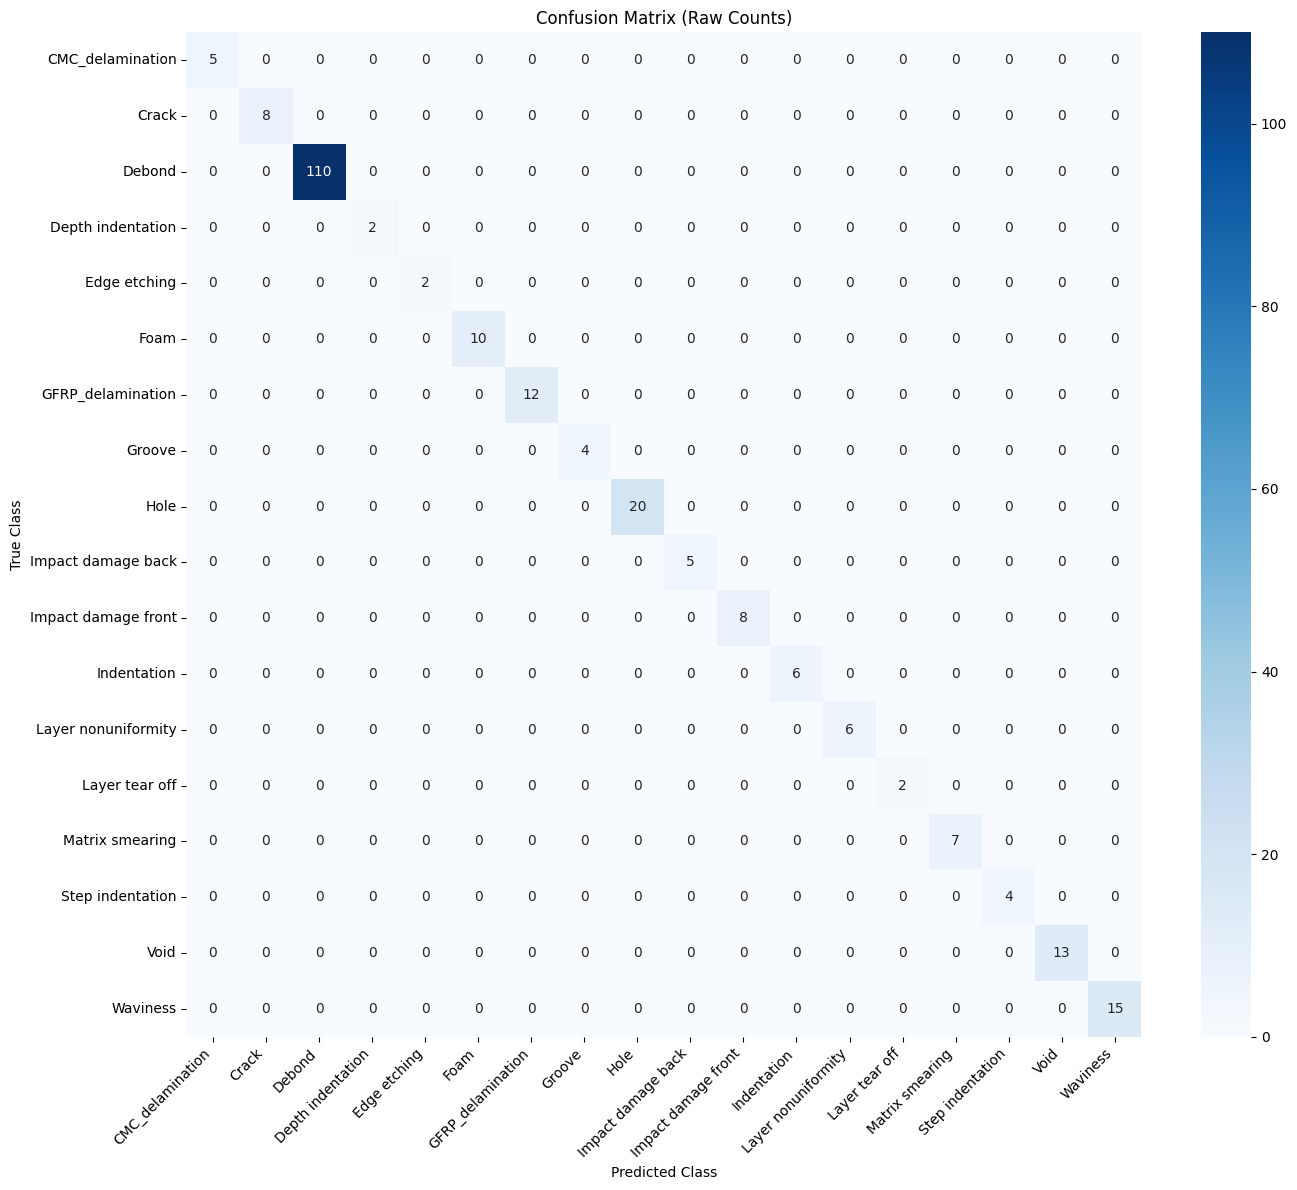

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Validation images and labels
val_img_dir = "/content/drive/MyDrive/18 yolo/images/val"
val_label_dir = "/content/drive/MyDrive/18 yolo/labels/val"

# Run prediction
results = model.predict(source=val_img_dir, imgsz=640, conf=0.25, stream=True)

# Initialize true and predicted labels lists
true_labels = []
predicted_labels = []

# Helper function to load ground-truth classes
def load_true_classes(image_name):
    base_name = os.path.splitext(image_name)[0]
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    classes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    cls_id = int(line.strip().split()[0])
                    classes.append(cls_id)
    return classes

# Analyze predictions
for result in results:
    image_name = os.path.basename(result.path)
    gt_classes = load_true_classes(image_name)

    pred_classes = [int(cls) for cls in result.boxes.cls.cpu().numpy()]

    # Match each ground truth label with the predicted class
    for true_cls in gt_classes:
        if true_cls in pred_classes:
            predicted_labels.append(true_cls)  # correct
            true_labels.append(true_cls)
        else:
            if len(pred_classes) > 0:
                predicted_labels.append(pred_classes[0])  # wrong
            else:
                predicted_labels.append(999)  # no prediction = background
            true_labels.append(true_cls)

# Compute confusion matrix
unique_classes = sorted(list(set(true_labels) | set(predicted_labels)))
if 999 in unique_classes:
    class_names = model.names.copy()
    class_names[999] = 'background'
else:
    class_names = model.names

cm = confusion_matrix(true_labels, predicted_labels, labels=unique_classes)

# ⚡⚡ Note: NO normalization here now

# Plot general (raw counts) confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=[class_names[c] for c in unique_classes],
            yticklabels=[class_names[c] for c in unique_classes])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix (Raw Counts)')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, classification_report
from ultralytics import YOLO

# Load model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Set paths
val_img_dir = "/content/drive/MyDrive/18 yolo/images/val"
val_label_dir = "/content/drive/MyDrive/18 yolo/labels/val"

# Run prediction silently
results = model.predict(source=val_img_dir, imgsz=640, conf=0.25, stream=True, verbose=False)

# Collect true and predicted class labels (only class IDs, no image print)
true_labels, predicted_labels = [], []

def load_true_classes(image_name):
    base_name = os.path.splitext(image_name)[0]
    label_path = os.path.join(val_label_dir, base_name + '.txt')
    classes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    cls_id = int(line.strip().split()[0])
                    classes.append(cls_id)
    return classes

for result in results:
    image_name = os.path.basename(result.path)
    gt_classes = load_true_classes(image_name)
    pred_classes = [int(cls) for cls in result.boxes.cls.cpu().numpy()]

    for true_cls in gt_classes:
        if true_cls in pred_classes:
            predicted_labels.append(true_cls)
        else:
            predicted_labels.append(pred_classes[0] if pred_classes else 999)
        true_labels.append(true_cls)

# Prepare class names
class_names = model.names.copy()
if 999 in true_labels or 999 in predicted_labels:
    class_names[999] = "background"

used_classes = sorted(set(true_labels + predicted_labels))

# Compute precision, recall, F1
precision, recall, f1, support = precision_recall_fscore_support(
    true_labels, predicted_labels, labels=used_classes, zero_division=0
)

# Print metrics
print(f"{'Class':<20}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Instances'}")
for idx, cls in enumerate(used_classes):
    name = class_names[cls]
    print(f"{name:<20}{precision[idx]:<12.2f}{recall[idx]:<12.2f}{f1[idx]:<12.2f}{support[idx]}")

# Overall summary
print("\nOverall Metrics:")
report = classification_report(true_labels, predicted_labels, target_names=[class_names[i] for i in used_classes], zero_division=0)
print(report)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Class               Precision   Recall      F1-Score    Instances
CMC_delamination    1.00        1.00        1.00        5
Crack               1.00        1.00        1.00        8
Debond              1.00        1.00        1.00        110
Depth indentation   1.00        1.00        1.00        2
Edge etching        1.00        1.00        1.00        2
Foam                1.00        1.00        1.00        10
GFRP_delamination   1.00        1.00        1.00        12
Groove              1.00        1.00        1.00        4
Hole                1.00        1.00        1.00        20
Impact damage back  1.00        1.00        1.00        5
Impact damage front 1.00        1.00  

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,620,486 parameters, 0 gradients, 164.9 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 4.6±3.8 MB/s, size: 7.7 KB)


val: Scanning /content/drive/MyDrive/18 yolo/labels/val.cache... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]


                   all        141        239      0.955      0.946      0.987      0.959
      CMC_delamination          5          5      0.917        0.8      0.962      0.811
                 Crack          7          8          1      0.933      0.995      0.881
                Debond         36        110      0.997          1      0.995      0.994
     Depth indentation          2          2          1      0.836      0.995      0.895
          Edge etching          2          2      0.886          1      0.995      0.995
                  Foam         10         10      0.967          1      0.995      0.995
     GFRP_delamination          7         12      0.977          1      0.995      0.963
                Groove          2          4      0.932          1      0.995      0.995
                  Hole         12         20      0.985          1      0.995      0.973
    Impact damage back          5          5          1      0.734      0.938      0.938
   Impact damage fron

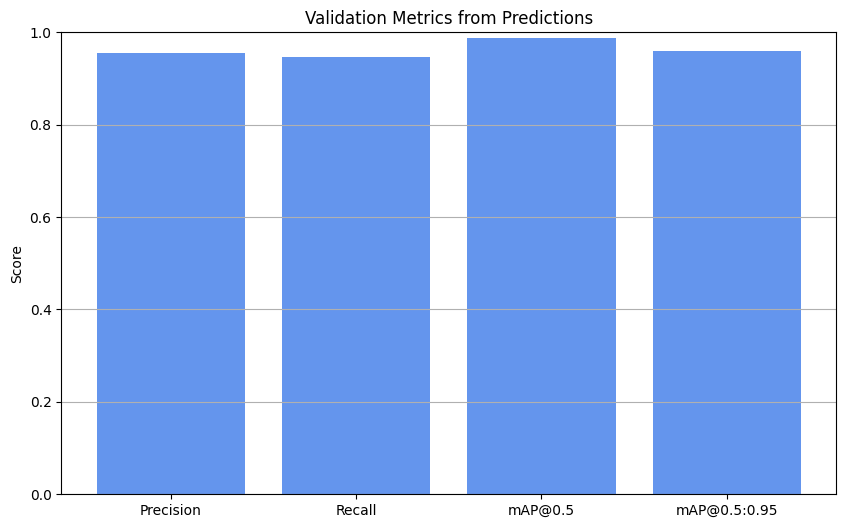

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Run validation
metrics = model.val(data="/content/drive/MyDrive/18 yolo/data.yaml")

# Extract values
precision = metrics.box.mp
recall = metrics.box.mr
map50 = metrics.box.map50
map = metrics.box.map

# Bar chart for all 4
plt.figure(figsize=(10, 6))
plt.bar(["Precision", "Recall", "mAP@0.5", "mAP@0.5:0.95"], [precision, recall, map50, map], color="cornflowerblue")
plt.title("Validation Metrics from Predictions")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.ylabel("Score")
plt.show()


In [ ]:
from ultralytics import YOLO

# Load your model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Run validation and get metrics
metrics = model.val(data="/content/drive/MyDrive/18 yolo/data.yaml", split="val", conf=0.25)


Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,620,486 parameters, 0 gradients, 164.9 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 93.6MB/s]

val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 5.0±4.2 MB/s, size: 15.1 KB)



val: Scanning /content/drive/MyDrive/18 yolo/labels/val.cache... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.22it/s]


                   all        141        239      0.967      0.969      0.986      0.959
      CMC_delamination          5          5      0.874        0.8      0.962      0.826
                 Crack          7          8          1      0.966      0.995      0.881
                Debond         36        110          1          1      0.995      0.994
     Depth indentation          2          2          1      0.984      0.995      0.895
          Edge etching          2          2          1          1      0.995      0.995
                  Foam         10         10          1          1      0.995      0.995
     GFRP_delamination          7         12          1          1      0.995      0.966
                Groove          2          4          1          1      0.995      0.995
                  Hole         12         20          1          1      0.995      0.977
    Impact damage back          5          5          1      0.789      0.938      0.938
   Impact damage fron

In [ ]:
import os
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Load trained YOLOv8 model
model = YOLO("/content/drive/MyDrive/YOLOv8_Retraining/retrain_results/weights/Final best.pt")

# Path to validation images and labels
val_img_dir = "/content/drive/MyDrive/18 yolo/images/val"
val_label_dir = "/content/drive/MyDrive/18 yolo/labels/val"

# Run prediction on validation set
results = model.predict(source=val_img_dir, imgsz=640, conf=0.25, stream=True)

# Function to load true label classes for an image
def load_true_classes(image_name):
    base_name = os.path.splitext(image_name)[0]
    label_path = os.path.join(val_label_dir, base_name + ".txt")

    true_classes = set()
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    cls_id = int(line.strip().split()[0])
                    true_classes.add(cls_id)
    return true_classes

# Initialize list to store inference times
inference_times = []

# Visualize each prediction
def plot_result(result):
    img = result.orig_img.copy()
    image_name = os.path.basename(result.path)

    true_classes = load_true_classes(image_name)

    kept_boxes = []

    # Start measuring inference time
    start_time = time.time()

    for i, box in enumerate(result.boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])

        # Keep only if predicted class matches true class
        if cls_id in true_classes:
            kept_boxes.append((x1, y1, x2, y2, conf, cls_id))

    # Draw only correct predictions
    for (x1, y1, x2, y2, conf, cls_id) in kept_boxes:
        label = result.names[cls_id]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # End measuring inference time
    end_time = time.time()
    inference_time = (end_time - start_time) * 1000  # milliseconds
    inference_times.append(inference_time)

    # Convert BGR to RGB for display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{image_name}\nCorrect Predictions Only\nInference Time: {inference_time:.2f} ms")
    plt.show()

# Loop through and display corrected predictions
for result in results:
    plot_result(result)

# After processing all images
average_inference_time = np.mean(inference_times)
print(f"\nAverage Inference Time across all images: {average_inference_time:.2f} ms")
